In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

current_font_list = matplotlib.rcParams['font.family']

font_path = "C:\Windows\Fonts\malgunbd.ttf"
kfont = matplotlib.font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rcParams['font.family'] = [kfont] + current_font_list

pd_data = pd.read_csv('이륜차신고현황_시도별_20230309164825.csv', encoding = 'cp949')
pd_data.drop(0, axis = 0, inplace = True)
pd_data.columns = ['시도명', '시점', '시군구', '경형합계', '소형합계', '중형합계', '대형합계', '관용경형', '관용소형', '관용중형', '관용대형', '자가용경형', '자가용소형', '자가용중형', '자가용대형']
pd_data

,시도명,시점,시군구,경형합계,소형합계,중형합계,대형합계,관용경형,관용소형,관용중형,관용대형,자가용경형,자가용소형,자가용중형,자가용대형
1,부산,2023.01,금정구,350,2072,5178,575,5,4,68,2,345,2068,5110,573
2,부산,2023.01,기장군,311,1473,3475,627,2,8,58,0,309,1465,3417,627
3,부산,2023.01,남구,451,2408,6964,941,3,10,18,0,448,2398,6946,941
4,부산,2023.01,동구,185,963,3009,321,2,22,32,1,183,941,2977,320
5,부산,2023.01,동래구,404,2133,5584,855,1,1,71,1,403,2132,5513,854
6,부산,2023.01,부산진구,633,3922,10094,1397,10,21,86,1,623,3901,10008,1396
7,부산,2023.01,북구,414,2075,5532,720,1,4,45,0,413,2071,5487,720
8,부산,2023.01,사상구,576,2276,5989,603,26,38,96,1,550,2238,5893,602
9,부산,2023.01,사하구,528,2888,8168,969,6,2,72,0,522,2886,8096,969
10,부산,2023.01,서구,207,1486,4033,342,1,6,2,0,206,1480,4031,342


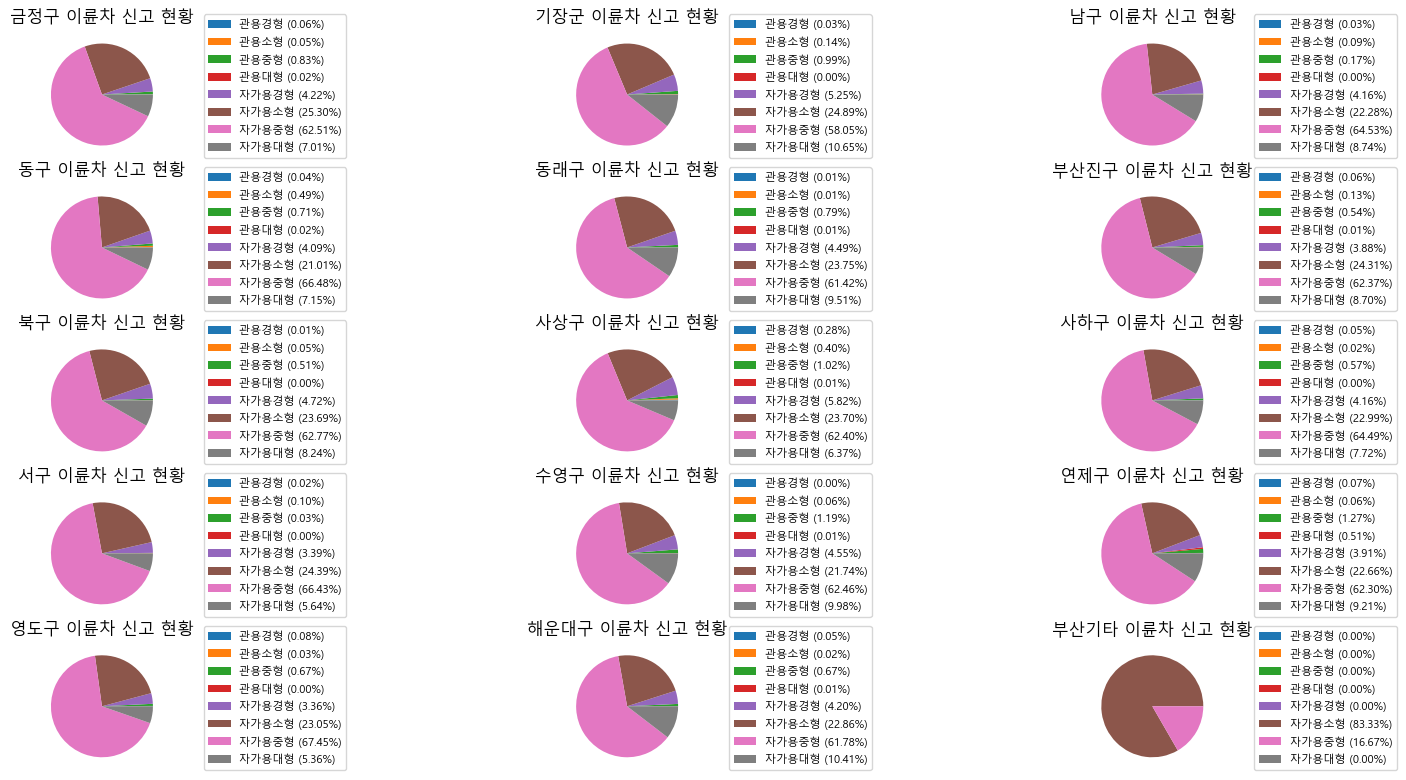

In [142]:
fil_list = ['관용경형', '관용소형', '관용중형', '관용대형', '자가용경형', '자가용소형','자가용중형', '자가용대형']
pd_data[fil_list] = pd_data[fil_list].astype(np.int64)
car_kind = pd.concat([pd_data['시군구'], pd_data[fil_list]], axis = 1)
car_kind = car_kind.set_index('시군구')
fig, axes = plt.subplots(5, 3, figsize = (6.4 * 3, 4.8 * 2), sharey = True, sharex = True)
for i, n in enumerate(car_kind.index):
    index_number = car_kind.index[(car_kind.index == n)]
    gu_list = car_kind.loc[index_number].values.tolist()[0]
    car_list = car_kind.columns.tolist()
    ax = axes[i // 3, i % 3]
    ax.set_title(n + ' 이륜차 신고 현황')
    ax.pie(gu_list)
    labels = [f'{car_list[i]} ({gu_list[i]/sum(gu_list)*100:.2f}%)' for i in range(len(car_list))]
    ax.legend(labels, loc=(1.3, 0), fontsize = 8)